### Libraries

In [47]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import category_encoders as ce
from sklearn.metrics import confusion_matrix
from sklearn import tree
import warnings

warnings.filterwarnings('ignore')

In [24]:
conda install -c conda-forge category_encoders

Solving environment: done

## Package Plan ##

  environment location: /Users/snehaltikone/opt/anaconda3

  added / updated specs:
    - category_encoders


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    category_encoders-2.4.0    |     pyhd8ed1ab_0          61 KB  conda-forge
    certifi-2021.10.8          |   py39h6e9494a_2         144 KB  conda-forge
    openssl-1.1.1n             |       h6c3fc93_0         1.9 MB  conda-forge
    ------------------------------------------------------------
                                           Total:         2.1 MB

The following NEW packages will be INSTALLED:

  category_encoders  conda-forge/noarch::category_encoders-2.4.0-pyhd8ed1ab_0

The following packages will be UPDATED:

  ca-certificates    anaconda::ca-certificates-2020.10.14-0 --> conda-forge::ca-certificates-2021.10.8-h033912b_0

The following packages will be SUPERSEDED by a highe

### Loading the data

In [52]:
df = pd.read_excel("/Users/snehaltikone/Spring_2022/DataMining/Decision Tree Project/mushrooms.xlsx")

In [53]:
print(df.info());

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [55]:
df.head(10)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
5,e,x,y,y,t,a,f,c,b,n,...,s,w,w,p,w,o,p,k,n,g
6,e,b,s,w,t,a,f,c,b,g,...,s,w,w,p,w,o,p,k,n,m
7,e,b,y,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,s,m
8,p,x,y,w,t,p,f,c,n,p,...,s,w,w,p,w,o,p,k,v,g
9,e,b,s,y,t,a,f,c,b,g,...,s,w,w,p,w,o,p,k,s,m


### Checking for NULL,NA or duplicate values

In [4]:
print("Null Data:\n",df.isnull().sum());
print("\nNA Data:\n",df.isna().sum());

Null Data:
 class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

NA Data:
 class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill

In [5]:
print(df.duplicated())

0       False
1       False
2       False
3       False
4       False
        ...  
8119    False
8120    False
8121    False
8122    False
8123    False
Length: 8124, dtype: bool


In [58]:
df.dtypes

class                       object
cap-shape                   object
cap-surface                 object
cap-color                   object
bruises                     object
odor                        object
gill-attachment             object
gill-spacing                object
gill-size                   object
gill-color                  object
stalk-shape                 object
stalk-root                  object
stalk-surface-above-ring    object
stalk-surface-below-ring    object
stalk-color-above-ring      object
stalk-color-below-ring      object
veil-type                   object
veil-color                  object
ring-number                 object
ring-type                   object
spore-print-color           object
population                  object
habitat                     object
dtype: object

In [8]:
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [9]:
df.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [12]:
for col in df:
  print(df[col].value_counts())

e    4208
p    3916
Name: class, dtype: int64
x    3656
f    3152
k     828
b     452
s      32
c       4
Name: cap-shape, dtype: int64
y    3244
s    2556
f    2320
g       4
Name: cap-surface, dtype: int64
n    2284
g    1840
e    1500
y    1072
w    1040
b     168
p     144
c      44
u      16
r      16
Name: cap-color, dtype: int64
f    4748
t    3376
Name: bruises, dtype: int64
n    3528
f    2160
y     576
s     576
a     400
l     400
p     256
c     192
m      36
Name: odor, dtype: int64
f    7914
a     210
Name: gill-attachment, dtype: int64
c    6812
w    1312
Name: gill-spacing, dtype: int64
b    5612
n    2512
Name: gill-size, dtype: int64
b    1728
p    1492
w    1202
n    1048
g     752
h     732
u     492
k     408
e      96
y      86
o      64
r      24
Name: gill-color, dtype: int64
t    4608
e    3516
Name: stalk-shape, dtype: int64
b    3776
?    2480
e    1120
c     556
r     192
Name: stalk-root, dtype: int64
s    5176
k    2372
f     552
y      24
Name: stalk-surf

In [11]:
df.head(10)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
5,e,x,y,y,t,a,f,c,b,n,...,s,w,w,p,w,o,p,k,n,g
6,e,b,s,w,t,a,f,c,b,g,...,s,w,w,p,w,o,p,k,n,m
7,e,b,y,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,s,m
8,p,x,y,w,t,p,f,c,n,p,...,s,w,w,p,w,o,p,k,v,g
9,e,b,s,y,t,a,f,c,b,g,...,s,w,w,p,w,o,p,k,s,m


### Summary

1. There are 23 columns and 8124 rows in the dataset
2. All the variables are categorical.
3. There are no null values in the dataset.
4. No duplicate rows.
5. The class is the target variable while other are the features.
6. The class can have either values
    p - mushroom is poisonous
    e - mushroom is edible
 

## Train and Test Dataset

In [14]:
X = df.drop(['class'], axis=1) #Features

y = df['class'] #Target Variable

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.35, random_state = 42)

In [16]:
X_train.shape, X_test.shape

((5280, 22), (2844, 22))

In [17]:
y_test.shape, y_test.shape

((2844,), (2844,))

In [29]:
# encode variables with ordinal encoding

encoder = ce.OrdinalEncoder(cols=['cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'])


X_train = encoder.fit_transform(X_train)

X_test = encoder.transform(X_test)

In [32]:
#Instantiating the decision tree using the entropy criterion

des_tree = DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=0)

#Fitting the model
des_tree.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=0)

#### Predicting the results

In [34]:
 y_pred = des_tree.predict(X_test)

In [37]:
print('Accuracy Score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Accuracy Score: 0.9989


### Comparing the train and test results

In [38]:
y_pred_train = des_tree.predict(X_train)

y_pred_train

array(['e', 'e', 'e', ..., 'e', 'p', 'e'], dtype=object)

In [39]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(des_tree.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(des_tree.score(X_test, y_test)))

Training set score: 0.9991
Test set score: 0.9989


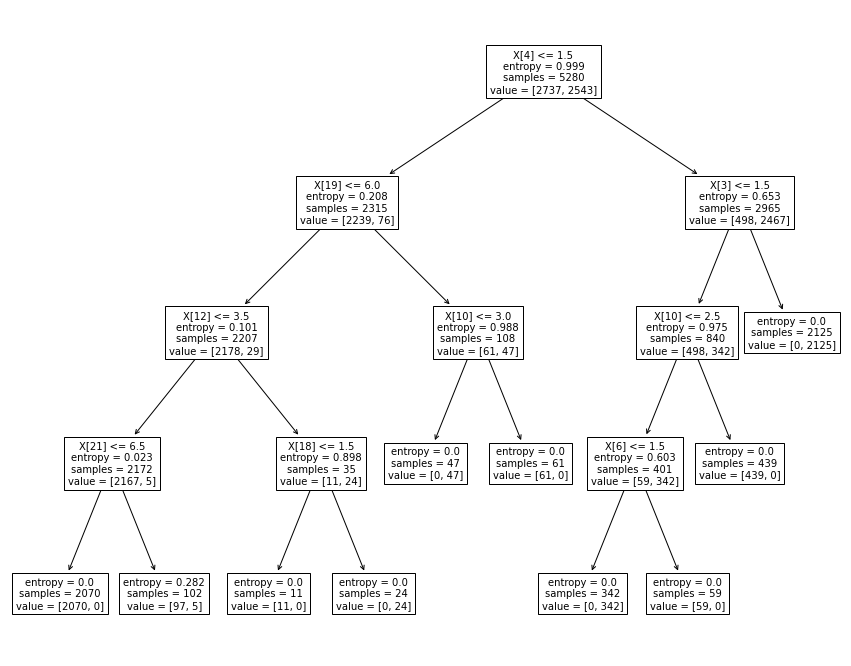

In [49]:
plt.figure(figsize=(15,12))
tree.plot_tree(des_tree,fontsize=10);

In [48]:
# Print the Confusion Matrix and slice it into four pieces
con_mat = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', con_mat)

Confusion matrix

 [[1471    0]
 [   3 1370]]


Text(0.5, 1.0, 'Confusion Matrix')

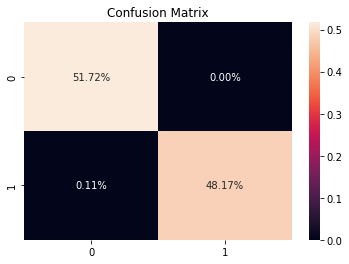

In [76]:
sns.heatmap(con_mat/np.sum(con_mat), annot=True, fmt='.2%').set_title("Confusion Matrix")


In [77]:
y_pred

array(['e', 'p', 'p', ..., 'e', 'e', 'e'], dtype=object)

In [79]:
np.unique(y_pred,return_counts=True)

(array(['e', 'p'], dtype=object), array([1474, 1370]))

In [80]:
np.unique(y_test,return_counts=True)

(array(['e', 'p'], dtype=object), array([1471, 1373]))